In [2]:
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tempfile
import os
import sys
import os
import cv2
import imghdr
import time

# Loading Data

In [2]:
train_path="B:/B.Kidwany/Graduation Project/Datasets/aug_classes"

In [3]:
x = []

In [4]:
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(128,128))

        x.append(img_arr)

# Sample Images

Found 6 files belonging to 2 classes.


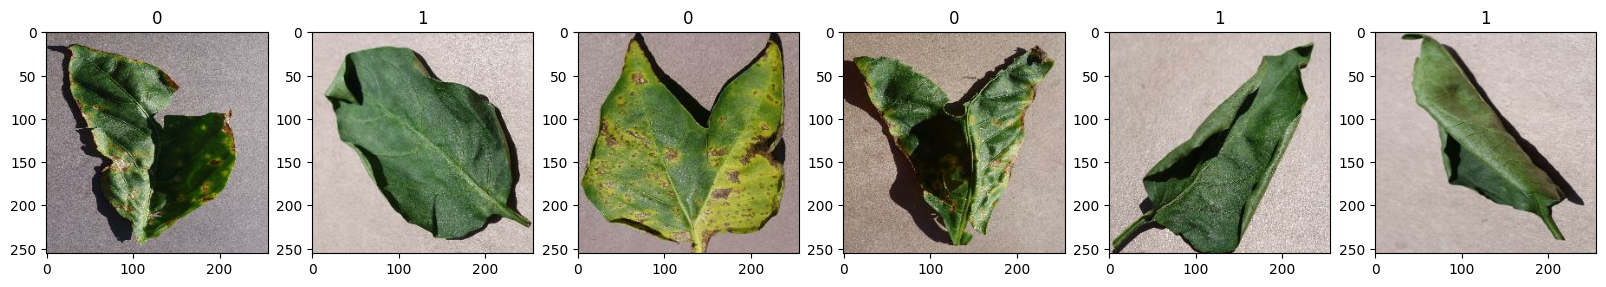

In [ ]:
sample = tf.keras.utils.image_dataset_from_directory('Sample')
sample_iterator = sample.as_numpy_iterator()
batch = sample_iterator.next()
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

# Data Preprocessing

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    zoom_range=0.1,
                                    rotation_range=0.8,
                                    fill_mode='nearest',
                                    height_shift_range= 0.1,
                                    width_shift_range=0.1,
                                    brightness_range = [0.8, 1.9])


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 128,
                                                 save_to_dir="B:/B.Kidwany/Graduation Project/Datasets/aug_classes",
                                                 class_mode = 'binary')
for i in range (20):
    training_set.next()



Found 5008 images belonging to 2 classes.


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 128,
                                                 class_mode = 'binary')

Found 5008 images belonging to 2 classes.


# Data Partitioning

In [6]:
x = np.array(x)
y = training_set.classes

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=.3, random_state=5)

In [8]:
x_test , x_val , y_test , y_val = train_test_split(x_test, y_test, test_size=.5, random_state=5)

In [9]:
print("Training Set:", x_train.shape[0], "\n", "Test Set:", x_test.shape[0], "\n", "Validation Set:", x_val.shape[0])

Training Set: 3505 
 Test Set: 751 
 Validation Set: 752


In [10]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

# Experimnet No. 1

In [11]:
cnn = Sequential([
            #cnn
            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', input_shape=(128,128,3)),
            MaxPooling2D(),

            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=128, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=512, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            

            #Dense
            Flatten(),
            Dense(2048,activation='leaky_relu'),
            Dense(1024,activation='leaky_relu'),
            Dense(512,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            
            Dense(1,activation='sigmoid')
])



cnn.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy",AUC()])
Cnn = cnn.fit(x_train, y_train,batch_size=32 ,workers = 2,validation_data=(x_val, y_val) , epochs=100)

Epoch 1/100
110/110 [==============================] - 15s 55ms/step - loss: 0.5390 - accuracy: 0.7401 - auc: 0.8390 - val_loss: 0.3872 - val_accuracy: 0.8654 - val_auc: 0.9722
Epoch 2/100
110/110 [==============================] - 5s 41ms/step - loss: 0.2283 - accuracy: 0.9350 - auc: 0.9734 - val_loss: 0.1895 - val_accuracy: 0.9584 - val_auc: 0.9886
Epoch 3/100
110/110 [==============================] - 4s 41ms/step - loss: 0.1372 - accuracy: 0.9709 - auc: 0.9924 - val_loss: 0.1019 - val_accuracy: 0.9715 - val_auc: 0.9942
Epoch 4/100
110/110 [==============================] - 4s 41ms/step - loss: 0.0824 - accuracy: 0.9769 - auc: 0.9944 - val_loss: 0.1274 - val_accuracy: 0.9395 - val_auc: 0.9966
Epoch 5/100
110/110 [==============================] - 5s 41ms/step - loss: 0.0612 - accuracy: 0.9820 - auc: 0.9975 - val_loss: 0.0641 - val_accuracy: 0.9852 - val_auc: 0.9962
Epoch 6/100
110/110 [==============================] - 5s 42ms/step - loss: 0.0943 - accuracy: 0.9712 - auc: 0.9941 - v

In [13]:
cnn.evaluate(x_test,y_test)

55/55 [==============================] - 1s 14ms/step - loss: 0.0346 - accuracy: 0.9886 - auc: 0.9993


[0.03461707383394241, 0.9885844588279724, 0.9993496537208557]

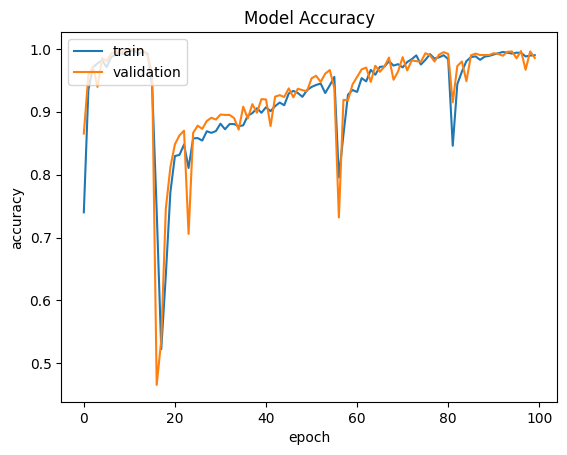

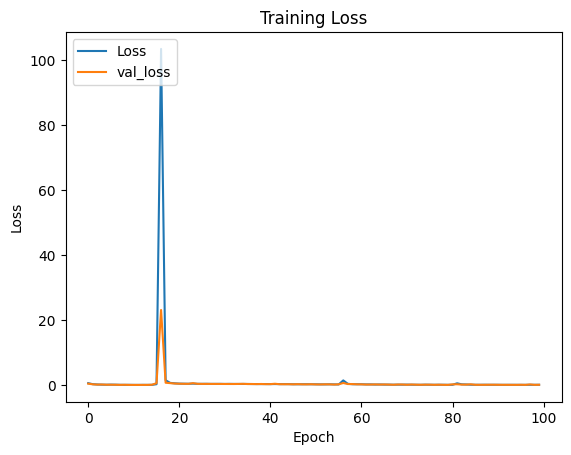

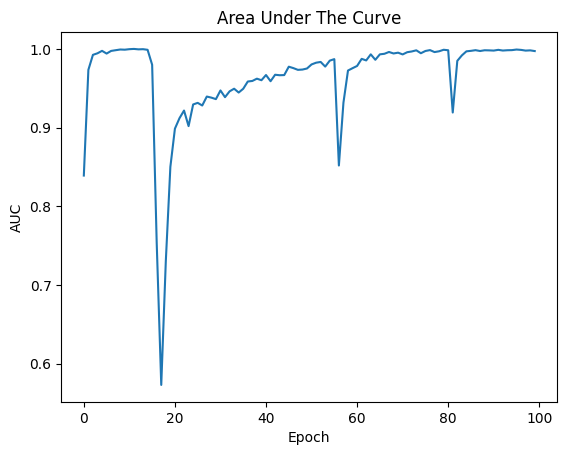

In [14]:
plt.plot(Cnn.history['accuracy'])
plt.plot(Cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['loss'])
plt.plot(Cnn.history['val_loss'])
plt.title("Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'val_loss'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['auc'])
plt.title('Area Under The Curve')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.show()

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

# Experimnet No. 2

In [11]:
cnn = Sequential([
            #cnn
            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', input_shape=(128,128,3)),
            MaxPooling2D(),

            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=128, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=512, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            

            #Dense
            Flatten(),
            Dense(2048,activation='leaky_relu'),
            Dense(1024,activation='leaky_relu'),
            Dense(512,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            
            Dense(1,activation='sigmoid')
])

reduce_lr_cb=ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.8,
                                    patience=2,
                                    min_lr=0.00001,
                                    mode='min',
                                    verbose=1)



cnn.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy",AUC()])
Cnn = cnn.fit(x_train, y_train,batch_size=32 ,workers = 2,validation_data=(x_val, y_val) , epochs=100, callbacks=reduce_lr_cb)

Epoch 1/100
110/110 [==============================] - 12s 54ms/step - loss: 0.6101 - accuracy: 0.6710 - auc: 0.7552 - val_loss: 0.5419 - val_accuracy: 0.6246 - val_auc: 0.9398 - lr: 0.0010
Epoch 2/100
110/110 [==============================] - 4s 41ms/step - loss: 0.5761 - accuracy: 0.7001 - auc: 0.7939 - val_loss: 0.6827 - val_accuracy: 0.5014 - val_auc: 0.9120 - lr: 0.0010
Epoch 3/100
110/110 [==============================] - 4s 40ms/step - loss: 0.4366 - accuracy: 0.7578 - auc: 0.9076 - val_loss: 0.3122 - val_accuracy: 0.9167 - val_auc: 0.9811 - lr: 0.0010
Epoch 4/100
110/110 [==============================] - 4s 40ms/step - loss: 0.2963 - accuracy: 0.8699 - auc: 0.9738 - val_loss: 0.1314 - val_accuracy: 0.9732 - val_auc: 0.9957 - lr: 0.0010
Epoch 5/100
110/110 [==============================] - 4s 40ms/step - loss: 0.1066 - accuracy: 0.9680 - auc: 0.9933 - val_loss: 0.1979 - val_accuracy: 0.9612 - val_auc: 0.9946 - lr: 0.0010
Epoch 6/100
110/110 [==============================] -

In [12]:
cnn.evaluate(x_test,y_test)

55/55 [==============================] - 1s 13ms/step - loss: 8.4629e-07 - accuracy: 1.0000 - auc: 1.0000


[8.462869232062076e-07, 1.0, 1.0]

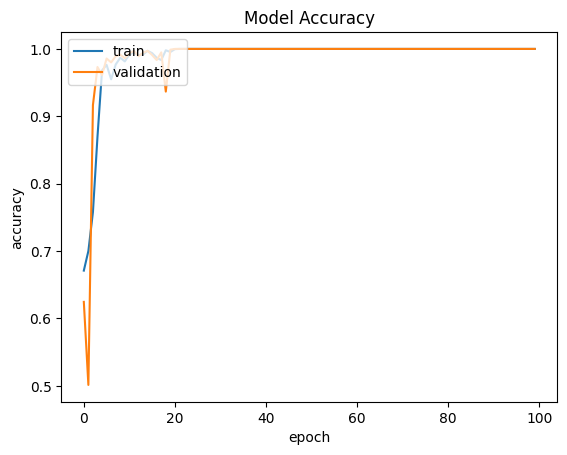

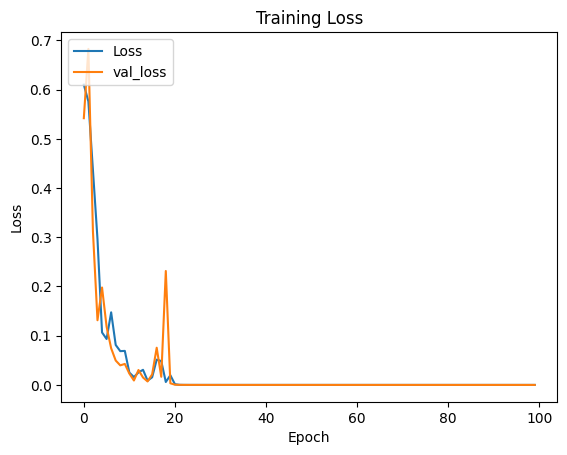

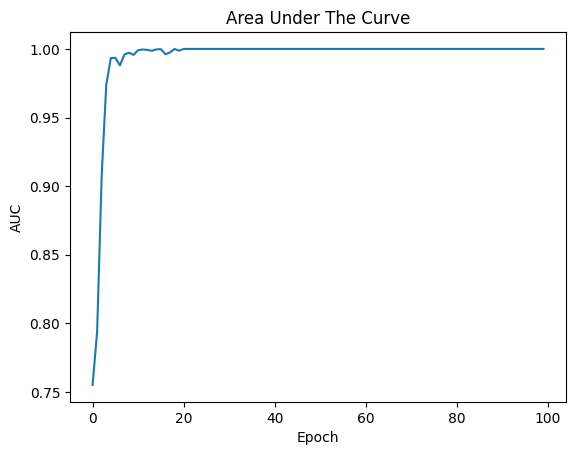

In [13]:
plt.plot(Cnn.history['accuracy'])
plt.plot(Cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['loss'])
plt.plot(Cnn.history['val_loss'])
plt.title("Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'val_loss'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['auc'])
plt.title('Area Under The Curve')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.show()

In [13]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)      

In [14]:
cnn.save(os.path.join('Models/Model-1.h5'))

# Experimnet No. 3

In [11]:
cnn = Sequential([
            #cnn
            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', input_shape=(128,128,3)),
            MaxPooling2D(),

            Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=128, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),


            Conv2D(filters=512, kernel_size=(3,3), activation='leaky_relu'),
            MaxPooling2D(),

            

            #Dense
            Flatten(),
            Dense(1024,activation='leaky_relu'),
            Dense(1024,activation='leaky_relu'),
            Dense(512,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(128,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(64,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(32,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(16,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            Dense(4,activation='leaky_relu'),
            Dense(1,activation='sigmoid')
])

reduce_lr_cb=ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.8,
                                    patience=2,
                                    min_lr=0.00001,
                                    mode='min',
                                    verbose=1)


cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) ,loss = "binary_crossentropy", metrics = ["accuracy",AUC()])
Cnn = cnn.fit(x_train, y_train,batch_size=32 ,workers = 2,validation_data=(x_val, y_val) , epochs=100, callbacks=reduce_lr_cb)

Epoch 1/100
110/110 [==============================] - 8s 42ms/step - loss: 0.6934 - accuracy: 0.5039 - auc: 0.5244 - val_loss: 0.6931 - val_accuracy: 0.4986 - val_auc: 0.5069 - lr: 0.0010
Epoch 2/100
110/110 [==============================] - 4s 35ms/step - loss: 0.6934 - accuracy: 0.5004 - auc: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.4986 - val_auc: 0.6266 - lr: 0.0010
Epoch 3/100
109/110 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.4966 - auc: 0.4998
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
110/110 [==============================] - 4s 35ms/step - loss: 0.6936 - accuracy: 0.4961 - auc: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.4986 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/100
110/110 [==============================] - 4s 35ms/step - loss: 0.6940 - accuracy: 0.5435 - auc: 0.5007 - val_loss: 0.6922 - val_accuracy: 0.4974 - val_auc: 0.5943 - lr: 8.0000e-04
Epoch 5/100
110/110 [==============================] - 4s 35ms/ste

In [12]:
cnn.evaluate(x_test, y_test)

55/55 [==============================] - 1s 11ms/step - loss: 2.2919e-06 - accuracy: 1.0000 - auc: 1.0000


[2.2919330149306916e-06, 1.0, 1.0]

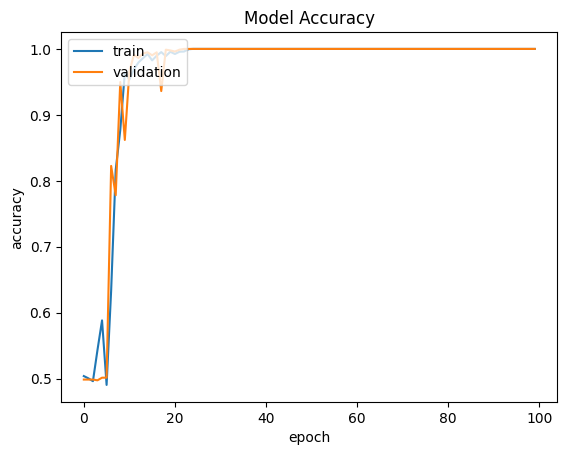

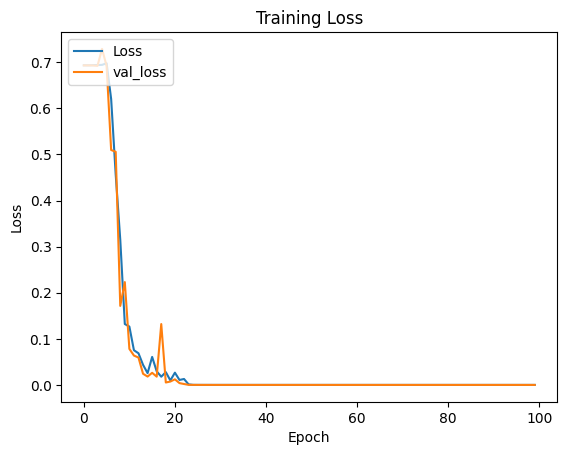

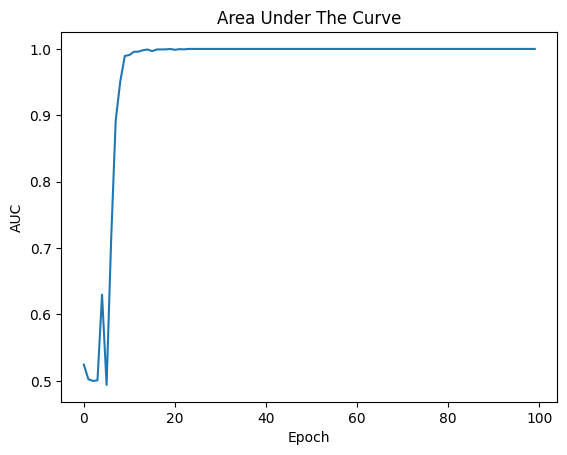

In [13]:
plt.plot(Cnn.history['accuracy'])
plt.plot(Cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['loss'])
plt.plot(Cnn.history['val_loss'])
plt.title("Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'val_loss'], loc = 'upper left')
plt.show()

plt.plot(Cnn.history['auc'])
plt.title('Area Under The Curve')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.show()

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [15]:
cnn.save(os.path.join('Models/Model-7.h5'))